# %load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def lorenz(xyz, *, s=0.7, r=28, b=2.667):
    _, x, y, z = xyz
    x_dot = 0.7*y + ()
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[5000:10000].T, lw=0.5)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

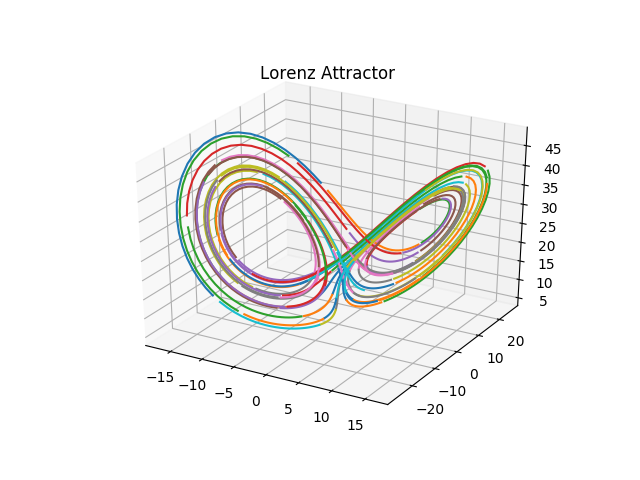

[6.4, 4.8]

In [2]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[7500:10000]
xyz_coords = xyz_coords[7500:10000]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 25
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,100):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()
plt.rcParams['figure.figsize']

In [ ]:
def embedding(xyz):
    

In [3]:
t2s = Traj2Sim()

load=True

if load == False:
    t2s.set_trajectories(traj_list[:-2])
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='lorenz.npy')
if load == True:
    t2s.load_bifilt(filename='lorenz.npy')

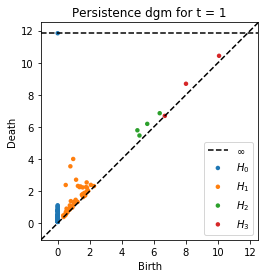

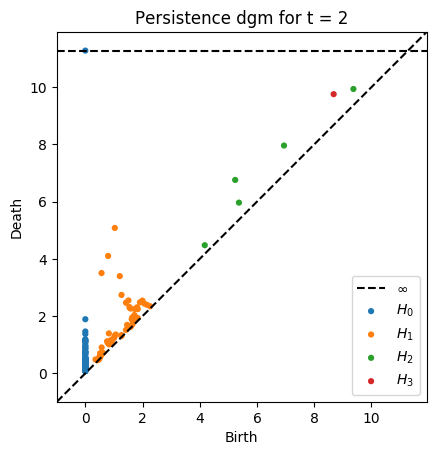

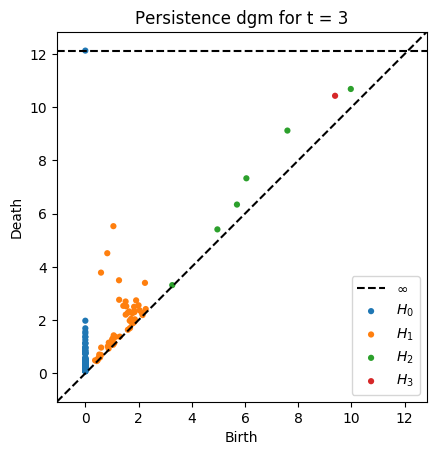

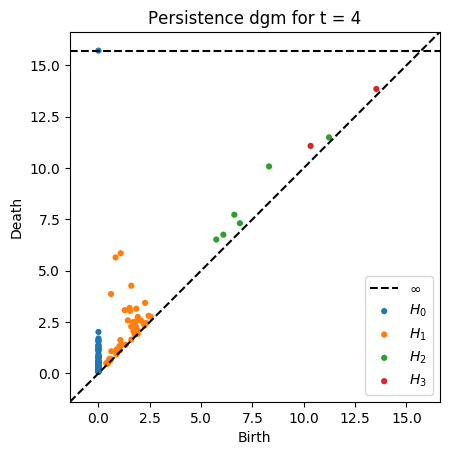

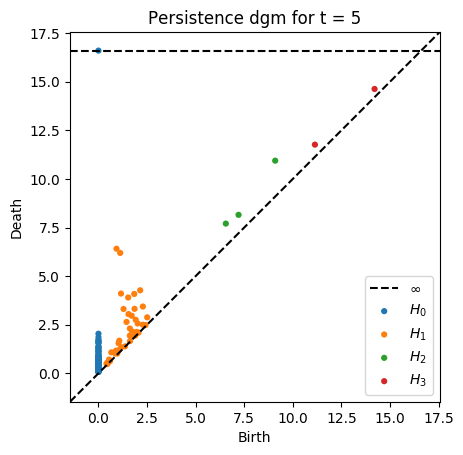

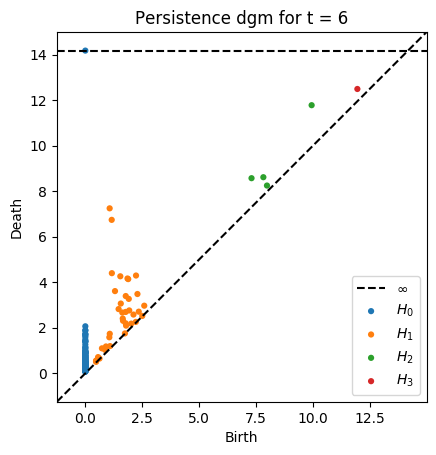

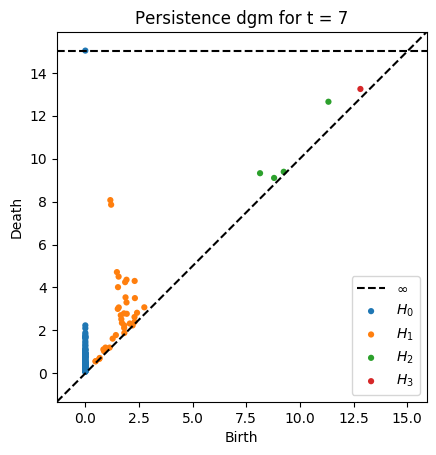

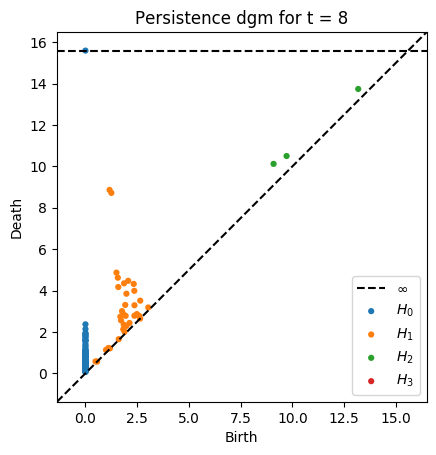

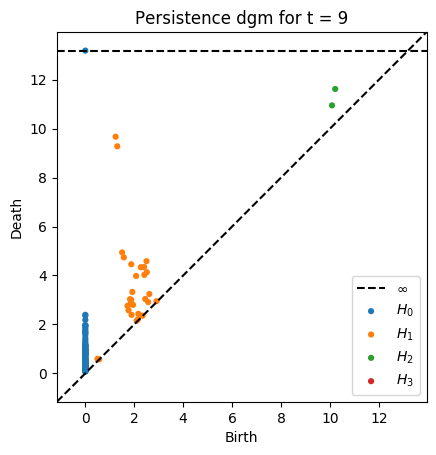

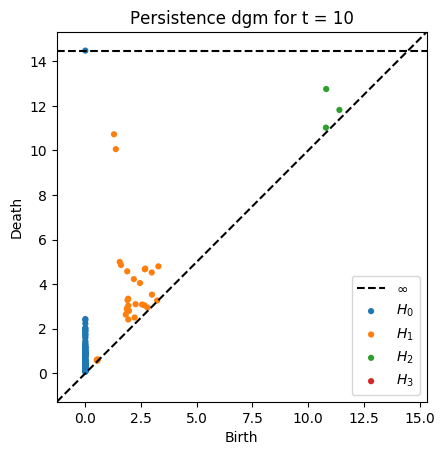

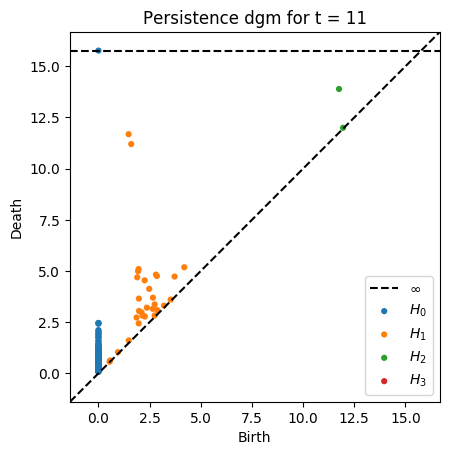

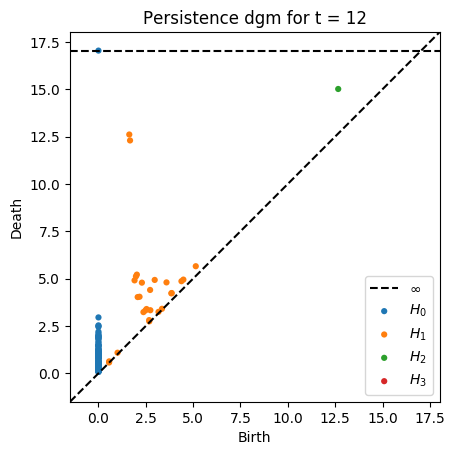

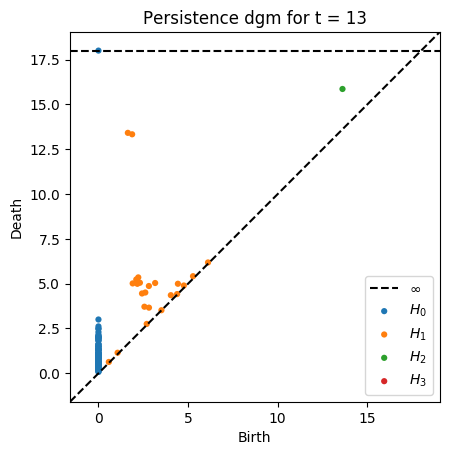

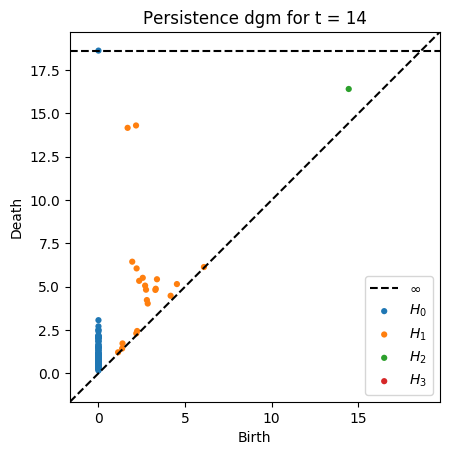

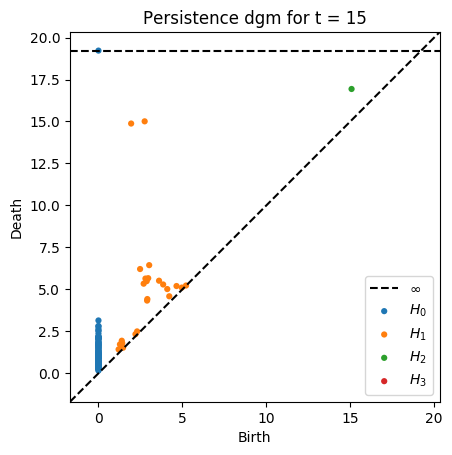

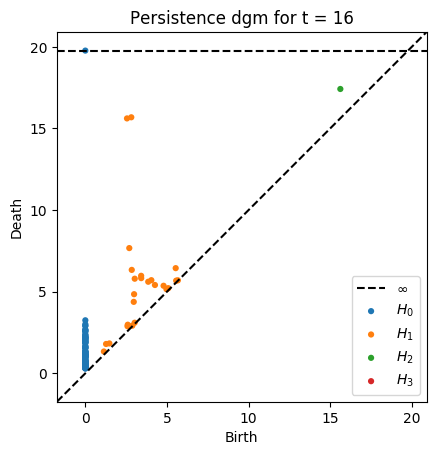

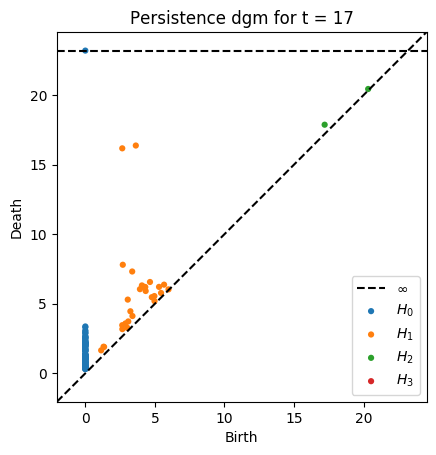

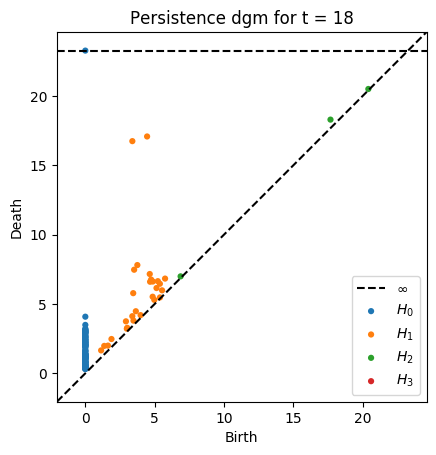

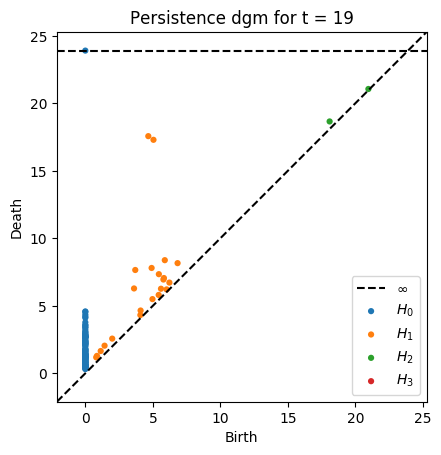

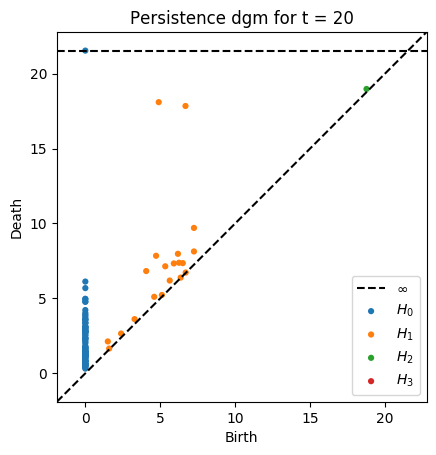

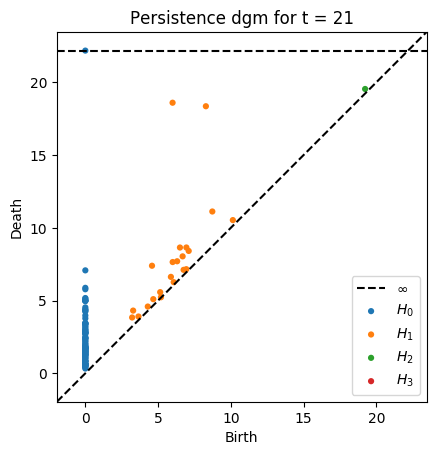

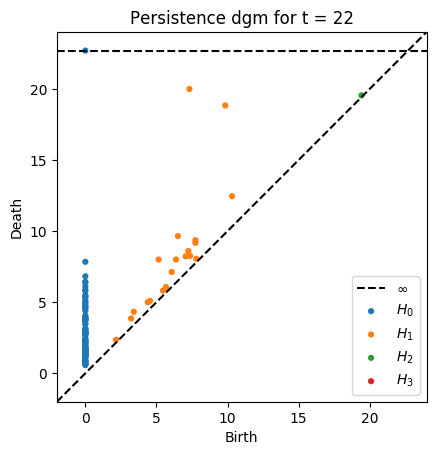

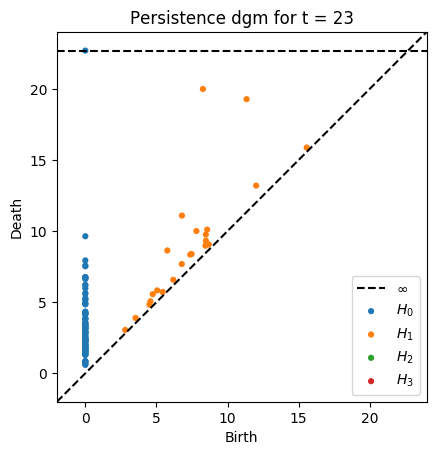

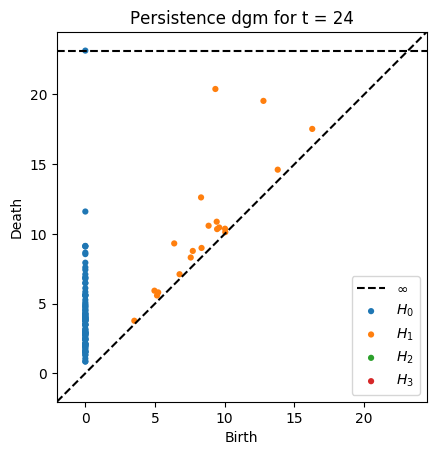

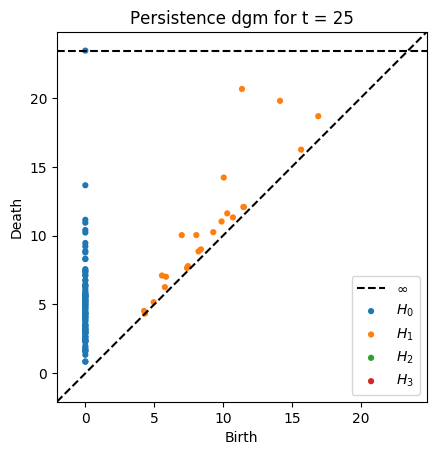

In [46]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)